In [1]:
#Imports
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import io
from tslearn.utils import *
from tslearn.clustering import TimeSeriesKMeans
from contextlib import redirect_stdout

In [12]:
numCompanies = 9
numClusters = 4
seed = 0
np.random.seed(seed)
numQuarters = 33

#Get Companies
companiesCSV = pd.read_csv('./DataFrames/Combined_data.csv',index_col = 0)
display(companiesCSV)   

,Year,Quarter,Revenue,Cost of revenue,Net income,Earnings per share,Current assets,Total assets,Current liabilities,Shareholders' equity,...,Stock price,Amazon,AMD,Apple,Cisco,Google,IBM,Intel,Nvidia,TI
Amazon com Inc 2008-2,2008,2,4135.0,3179.0,143.0,0.34,3965.0,5883.0,3551.0,1470.0,...,76.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amazon com Inc 2008-3,2008,3,4063.0,3096.0,158.0,0.37,4236.0,6322.0,3216.0,2230.0,...,73.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amazon com Inc 2008-4,2008,4,4264.0,3265.0,118.0,0.27,4430.0,6566.0,3144.0,2527.0,...,69.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amazon com Inc 2009-2,2009,2,4889.0,3741.0,177.0,0.41,4775.0,6980.0,3410.0,2918.0,...,73.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amazon com Inc 2009-3,2009,3,4651.0,3518.0,142.0,0.32,5304.0,7675.0,3636.0,3256.0,...,81.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Texas Instruments 2017-3,2017,3,3693.0,1319.0,1056.0,1.03,7511.0,16438.0,1877.0,10708.0,...,76.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Texas Instruments 2017-4,2017,4,4116.0,1460.0,1285.0,1.26,7991.0,16929.0,2055.0,10988.0,...,89.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Texas Instruments 2018-2,2018,2,3789.0,1342.0,1366.0,1.35,8590.0,17507.0,1860.0,10642.0,...,100.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Texas Instruments 2018-3,2018,3,4017.0,1398.0,1405.0,1.40,9592.0,18527.0,1466.0,10634.0,...,110.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Year,Month,Day,Amazon,AMD,Apple,Cisco,Google,IBM,Intel,Nvidia,TI
0,2008,1,2,96.25,7.14,24.2913,20.6960,342.9379,74.7463,17.6125,30.4223,24.3111
1,2008,1,3,95.21,6.77,24.3026,20.8598,343.0080,74.8962,17.1401,30.1827,23.7775
2,2008,1,4,88.79,6.25,22.4474,20.3685,328.8288,72.2046,15.7505,27.6483,22.9434
3,2008,1,7,88.82,6.08,22.1470,20.3763,324.9500,71.4335,15.8964,24.7913,22.9133
4,2008,1,8,87.88,6.00,21.3503,19.8305,316.1562,69.6771,15.4657,25.3166,22.9208
...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2018,12,24,1343.96,16.65,145.0908,39.1732,984.6700,103.8591,42.7631,126.6790,86.0489
2765,2018,12,26,1470.90,17.90,155.3083,41.3031,1047.8500,107.5474,45.3137,132.6801,91.1256
2766,2018,12,27,1461.64,17.49,154.3004,41.7310,1052.9000,109.8549,45.4805,130.7561,91.9391
2767,2018,12,28,1478.02,17.82,154.3795,41.5948,1046.6801,109.1308,45.8631,133.2283,91.9391


In [13]:
#Split companies into their own data structures
#Format each company to a time series for use with tslearn
companyNames = []
companyStockPrices = []
formatted_time_series = []

for company in range(0,numCompanies):
    companyNames.append(companiesCSV.index.values[company*numQuarters])
    companyStockPrices.append(companiesCSV[company*numQuarters:(
        company+1)*numQuarters].filter(items=['Stock price']))

    initialStockPrice = companyStockPrices[company].iloc[0,0]
    for stockPrice in range(0,len(companyStockPrices[company])):
        companyStockPrices[company].iloc[stockPrice,0] -= initialStockPrice
    companyStockPrices[company] = companyStockPrices[company].T
    companyStockPrices[company] = companyStockPrices[company].to_numpy()
    formatted_time_series.append(to_time_series(companyStockPrices[company]))
    display(companyStockPrices)

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]])]

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]])]

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

[array([[   0.   ,   -3.08 ,   -7.12 ,   -3.2  ,    4.9  ,   14.34 ,
           55.11 ,   34.26 ,   77.01 ,  103.43 ,  132.79 ,  135.28 ,
          121.35 ,  152.62 ,  175.31 ,  184.91 ,  205.4  ,  244.25 ,
          266.29 ,  255.69 ,  240.76 ,  293.555,  360.69 ,  444.02 ,
          521.8  ,  648.98 ,  760.04 ,  814.81 ,  876.96 ,  882.49 ,
         1295.29 , 1637.08 , 1927.66 ]]),
 array([[ 0.  , -0.42, -1.33, -3.05, -2.16, -0.68,  3.3 ,  1.32,  0.98,
          2.29,  1.04, -1.54,  2.13, -0.32, -2.79, -3.63, -1.97, -2.21,
         -2.  , -1.85, -2.72, -3.38, -3.65, -4.33, -3.24, -1.  ,  0.88,
          8.57,  6.08,  6.64,  3.46,  9.09, 25.35]]),
 array([[   0.  ,  -45.31,  -20.16, -104.09,  -86.15,  -52.01,   19.17,
           41.13,   53.64,  134.73,  149.72,  148.42,  216.39,  423.79,
          397.68,  354.19,  234.07,  214.38,  358.29,  346.81,  459.8 ,
          570.47,  674.91,  691.36,  542.61,  575.09,  476.39,  618.21,
          811.06,  809.66, 1010.98,  971.92, 1115.42]])

In [7]:
formatted_dataset = to_time_series_dataset(formatted_time_series)
sz = formatted_dataset.shape[1]
km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
clusterPredictions = km.fit_predict(formatted_dataset)
display(clusterPredictions)

array([3, 0, 2, 0, 1, 0, 0, 0, 0], dtype=int64)

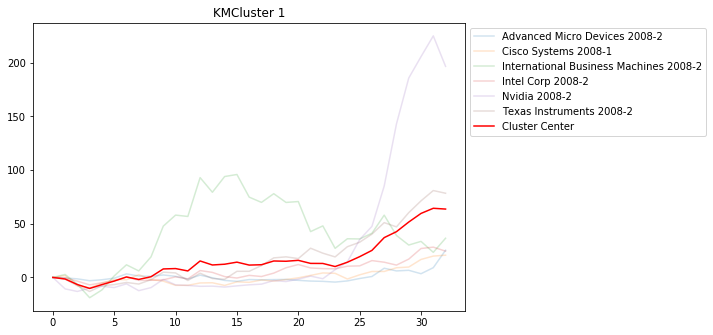

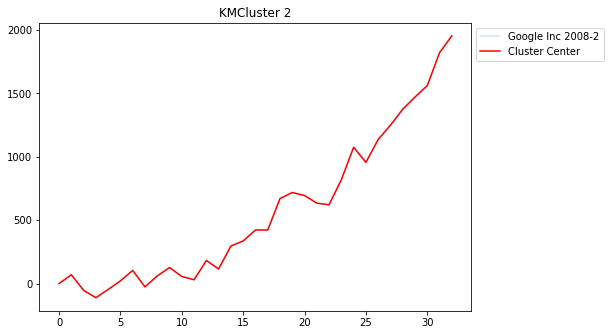

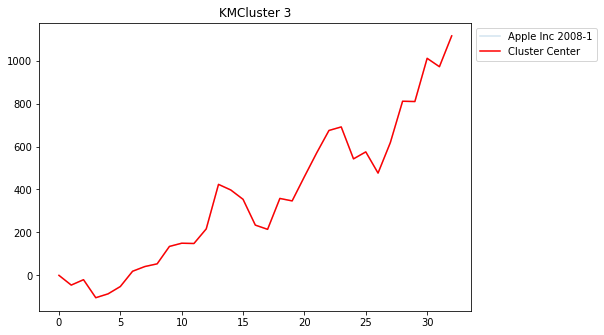

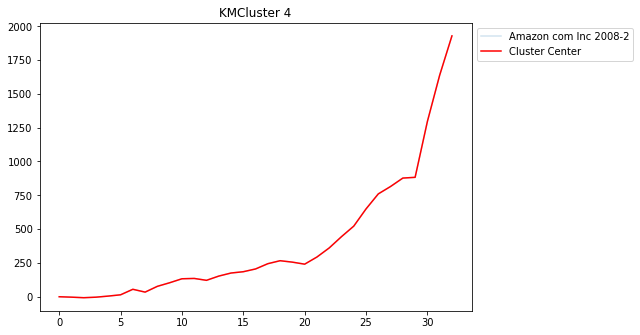

In [8]:
for cluster in range(numClusters):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(0,len(formatted_dataset)):
        if(clusterPredictions[j] == cluster):
            xx = formatted_dataset[j]
            ax.plot(xx.ravel(), alpha=.2, label=companyNames[j]) #"k-"
    ax.plot(km.cluster_centers_[cluster].ravel(), "r-", label='Cluster Center') 
    ax.set_title("KMCluster " + str(cluster+1))
    ax.legend(bbox_to_anchor=(1, 1))
    #plt.show()

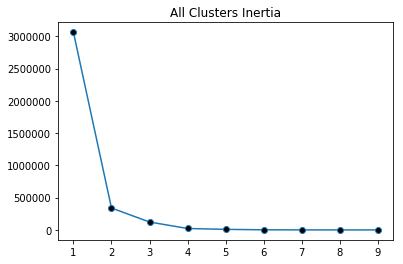

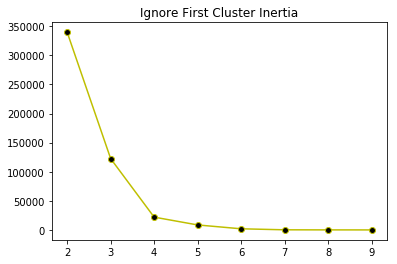

In [9]:
allInertias = []
companyAxis = []
for i in range(1,numCompanies+1):
    numClusters = i
    km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",verbose=True,
                              random_state=seed,n_init=3)

    capturedOutput = io.StringIO()
    with redirect_stdout(capturedOutput):
        clusterPredictions = km.fit_predict(formatted_dataset)
    inertiaOutput = capturedOutput.getvalue()
    inertiaOutputSplit = str.split(inertiaOutput,' --> ')
    inertia = inertiaOutputSplit[-2]
    allInertias.append(float(inertia))
    companyAxis.append(i)


plt.figure()
plt.title("All Clusters Inertia")
plt.plot(companyAxis,allInertias, marker='o', markerfacecolor='black')
plt.figure()
plt.title("Ignore First Cluster Inertia")
plt.plot(companyAxis[1:],allInertias[1:], 'y', marker = 'o', markerfacecolor='black')


In [ ]:
#This is for figuring out dynamic KMeans. Ignore this
def getInertia(capturedOutput):
    inertiaOutput = capturedOutput.getvalue()
    allInertias = str.split(inertiaOutput,' --> ')
    finalInertia = allInertias[-2]
    return finalInertia

def runKMeans(formatted_dataset, seed, numCompanies):
    numClusters = runKMeansPlusPLus(formatted_dataset, seed, numCompanies)
    km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
    return km.fit_predict(formatted_dataset), km

def runKMeansPlusPLus(formatted_dataset, seed, numCompanies):
    
    inDistances = getLineDistances(allInertias)
    print(inDistances)
    

    plt.scatter(companyAxis,inDistances)
    plt.show()
    #return min{inDistancesIndex}

    return 4
   


def getLineDistances(allInertias):
    """
    firstInertia = allInertias[0]
    firstInertiaSquared = firstInertia**2
    numCompanies = len(allInertias)
    denominator = math.sqrt(firstInertiaSquared+(len(allInertias)-1)**2)
    distances = []
    for i in range(numCompanies):
        numerator = firstInertia*(numCompanies-i) - ((numCompanies-1)*allInertias[i])
        distances.append(numerator/denominator)
    return distances
    """
    
    numCompanies = len(allInertias)
    slope = (-1)*allInertias[0]/(numCompanies-1)
    slopeSquared = slope**2
    #denominator = math.sqrt(slopeSquared+1)
    #print("denominator: " + str(denominator))
    distances = []
    a = slope
    b = -1
    c = allInertias[0] - slope
    denominator = math.sqrt(a*a + b*b)
    for i in range(numCompanies):
        x = i
        y = allInertias[i]
        numerator = math.fabs(a*x + b*y + c)
        print("numerator" + str(i) + ": " + str(numerator))
        distances.append(numerator/denominator)
    x = np.linspace(0,10,100)
    y = slope*x+allInertias[0] - slope
    plt.plot(x,y,'-r')
    return distances